<a href="https://colab.research.google.com/github/ShahG5/ShahG5/blob/main/CEP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img
tf.random.set_seed(123)
print(tf.__version__)

2.15.0


In [ ]:
import tensorflow as tf

# Define the directory containing the image data
directory = '/content/drive/MyDrive/Dataset'


ds_train = tf.keras.utils.image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=200,
    validation_split=0.2,
    subset="training",
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

ds_validation = tf.keras.utils.image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=200,
    validation_split=0.2,
    subset="validation",
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 31 files belonging to 2 classes.
Using 25 files for training.
Found 31 files belonging to 2 classes.
Using 6 files for validation.


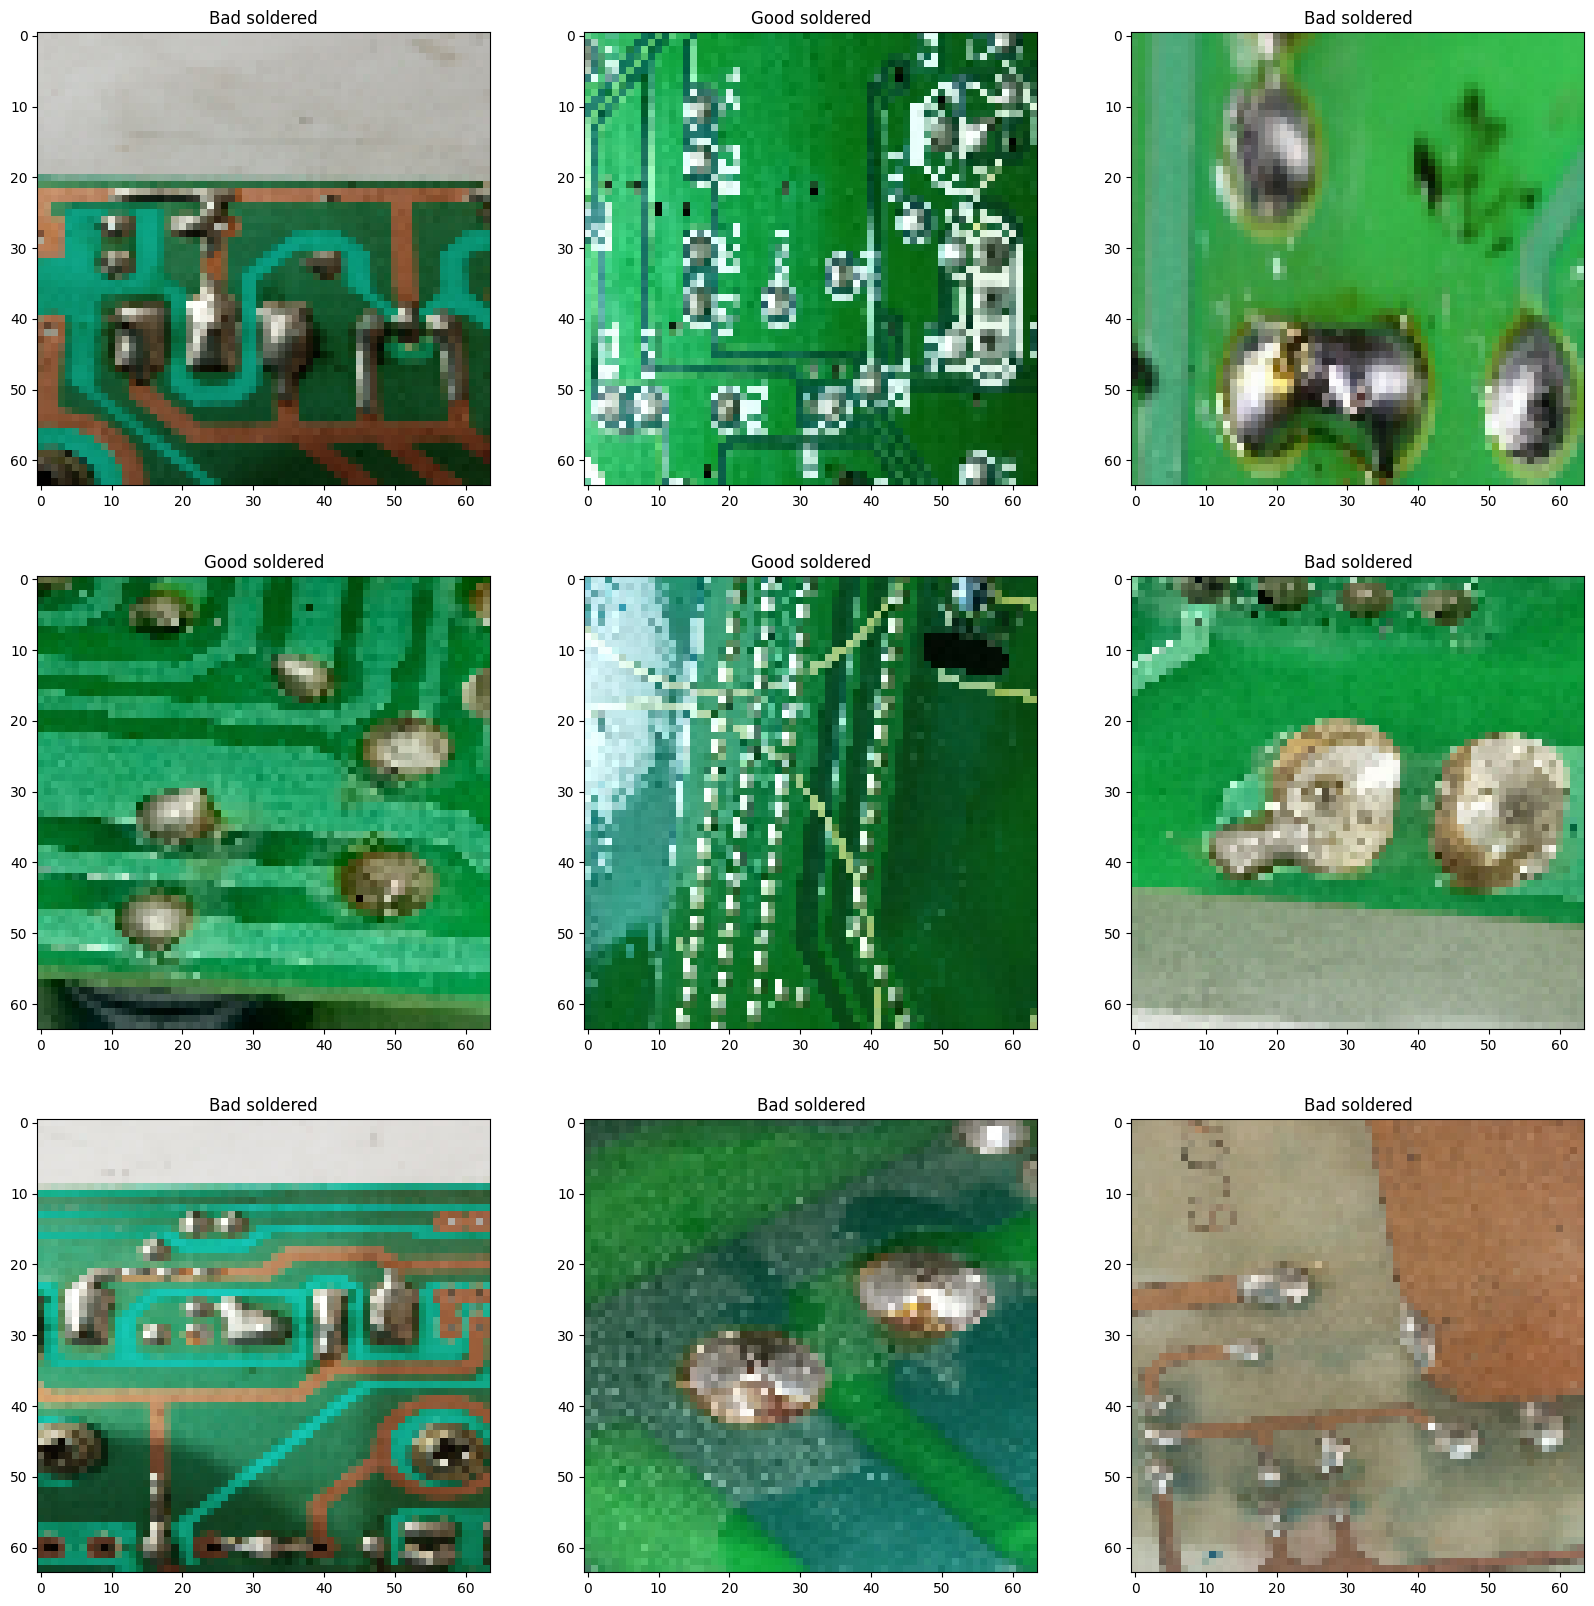

In [ ]:

import matplotlib.pyplot as plt
import numpy as np

# Get the class names from the training dataset
class_names = ds_train.class_names

# Plot the first 9 images from the training dataset
plt.figure(figsize=(20, 20))
for images, labels in ds_train.take(1):
    for i in range(9):
        # Create a subplot
        ax = plt.subplot(3, 3, i + 1)

        # Plot the image
        plt.imshow(images[i].numpy().astype("uint8"))

        # Get the predicted class for the image
        predicted_class = np.argmax(labels[i])

        # Add the predicted class label as the title
        plt.title(class_names[predicted_class])

# Building Model

In [ ]:
model_fazil = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dropout(0.5),# to avoid over fitting
    tf.keras.layers.Dense(units=2, activation='softmax') # Change the number of units to match the number of classes in the target labels
])

In [ ]:
model_fazil.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 512)               6

In [ ]:
# Compile the model
model_fazil.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
training_history = model_fazil.fit(x=ds_train, validation_data=ds_validation, epochs=5)

Epoch 1/5
1/1 [==============================] - 7s 7s/step - loss: 0.4529 - accuracy: 0.9200 - val_loss: 6.0106 - val_accuracy: 0.5000
Epoch 2/5
1/1 [==============================] - 3s 3s/step - loss: 5.2452e-08 - accuracy: 1.0000 - val_loss: 19.5309 - val_accuracy: 0.5000
Epoch 3/5
1/1 [==============================] - 3s 3s/step - loss: 2.2265 - accuracy: 0.8400 - val_loss: 18.3737 - val_accuracy: 0.6667
Epoch 4/5
1/1 [==============================] - 3s 3s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 56.0847 - val_accuracy: 0.6667
Epoch 5/5
1/1 [==============================] - 3s 3s/step - loss: 0.9645 - accuracy: 0.9600 - val_loss: 58.5485 - val_accuracy: 0.6667
